In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np

## Loading & Pre-processing

#### loading

In [2]:
df = pd.read_excel( 'SampleDataset.xlsx' )
df.set_index( ['Date'], inplace=True )

df['max'] = df[ ['Open', 'High', 'Low', 'Close'] ].max( axis = 1,  )
df['min'] = df[ ['Open', 'High', 'Low', 'Close'] ].min( axis = 1 )
df['daily_return'] =  [0] + list( ( ( df['Close'][1:].values - df['Close'][:(df.shape[0]-1)] ).values ) / df['Close'][:(df.shape[0]-1)].values )
df['intraday_move'] = ( df['Close'] - df['Open'] ) / df['Open']

#### detect potential errors

In [3]:
df.loc[ df.daily_return.abs() > 0.1 ]

,Signal,Open,High,Low,Close,Adj Close,max,min,daily_return,intraday_move
Date,,,,,,,,,,
2018-03-19,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221,196.279999,154.449997,0.243853,0.248839
2018-03-20,19.177721,156.669998,157.020004,155.770004,156.240005,150.669647,157.020004,155.770004,-0.203994,-0.002745


In [4]:
df.loc[ df.intraday_move.abs() > 0.1 ]

,Signal,Open,High,Low,Close,Adj Close,max,min,daily_return,intraday_move
Date,,,,,,,,,,
2018-03-19,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221,196.279999,154.449997,0.243853,0.248839


In [5]:
df.loc[ df['High'] != df['max'] ]

,Signal,Open,High,Low,Close,Adj Close,max,min,daily_return,intraday_move
Date,,,,,,,,,,
2017-08-07,16.298805,140.440002,140.350000,139.710007,140.440002,134.595871,140.440002,139.710007,0.001640,0.000000
2018-03-07,18.885411,154.460007,156.929993,157.220001,156.740005,151.151840,157.220001,154.460007,0.008818,0.014761
2018-03-19,18.660897,157.169998,157.210007,154.449997,196.279999,150.708221,196.279999,154.449997,0.243853,0.248839
2018-07-16,20.010313,167.759995,168.029999,169.960007,166.770004,161.779312,169.960007,166.770004,-0.003882,-0.005901
2018-12-06,16.904044,145.449997,147.099997,143.429993,147.199997,143.173874,147.199997,143.429993,-0.002169,0.012032
2019-10-17,18.878412,152.289993,153.309995,152.050003,153.339996,151.102173,153.339996,152.050003,0.011811,0.006895


In [6]:
df.loc[ df['Low'] != df['min'] ]

,Signal,Open,High,Low,Close,Adj Close,max,min,daily_return,intraday_move
Date,,,,,,,,,,
2017-07-04,15.282748,141.339996,142.600000,141.400003,142.200006,135.700998,142.600000,141.339996,0.000704,0.006085
2017-09-11,15.838558,140.389999,140.919998,140.229996,139.110001,133.321198,140.919998,139.110001,0.000000,-0.009117
2017-09-12,15.518587,141.039993,141.690002,140.820007,139.110001,133.321198,141.690002,139.110001,0.000000,-0.013684
2017-09-13,16.158529,141.410004,142.220001,141.320007,139.110001,133.321198,142.220001,139.110001,0.000000,-0.016265
2017-09-14,16.478500,141.779999,142.160004,141.419998,139.110001,133.321198,142.160004,139.110001,0.000000,-0.018832
2017-09-15,15.198617,141.639999,142.470001,141.550003,139.110001,133.321198,142.470001,139.110001,0.000000,-0.017862
2017-09-18,15.518587,142.619995,143.809998,142.600006,139.110001,133.321198,143.809998,139.110001,0.000000,-0.024611
2017-09-19,16.798471,143.570007,143.690002,143.089996,139.110001,133.321198,143.690002,139.110001,0.000000,-0.031065
2017-09-20,15.953688,143.529999,144.020004,143.259995,139.110001,133.321198,144.020004,139.110001,0.000000,-0.030795


#### fix errors

In [7]:
df.loc[ df.intraday_move.abs() > 0.1, 'Close'] = ( df.loc[ df.intraday_move.abs() > 0.1 ]['High'] + df.loc[ df.intraday_move.abs() > 0.1 ]['Low'] ).values/2
df['max'] = df[ ['Open', 'High', 'Low', 'Close'] ].max( axis = 1,  )
df['min'] = df[ ['Open', 'High', 'Low', 'Close'] ].min( axis = 1 )
df['daily_return'] =  [0] + list( ( ( df['Close'][1:].values - df['Close'][:(df.shape[0]-1)] ).values ) / df['Close'][:(df.shape[0]-1)].values )
df['intraday_move'] = ( df['Close'] - df['Open'] ) / df['Open']
df['High'] = df['max']
df['Low'] = df['min']

<AxesSubplot:xlabel='Date'>

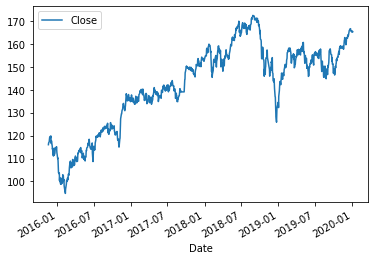

In [8]:
df.plot( y=['Close'])

## Implement Simple linear regression

In [9]:
df = df.loc[ df.Signal != 0 ]

#### strong linear trend

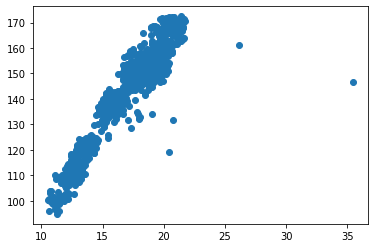

In [10]:
plt.scatter( df['Signal'], df['Close'])

#### Best fitting result by taking 7-days signals

In [11]:
for i in range( 1, 21 ):
    df['Signal_Lag'+str(i)] = [0]*i + list( df['Signal'][:(df.shape[0]-i) ].values )

for k in range( 1, 21 ):
    X1 = df[['Signal']+['Signal_Lag'+str(i) for i in range(1, k) ]][k:]
    y1 = df['Close'][k:]
    reg1 = LinearRegression().fit( X1, y1 )
    print( k, reg1.score( X1, y1 ), 1 - (1-reg1.score(X1, y1))*(len(y1)-1)/(len(y1)-X1.shape[1]-1) )

1 0.8679438364302876 0.8678155019661771
2 0.9108875792146149 0.9107140399336308
3 0.9281372716235453 0.9279269416868338
4 0.9391213757159905 0.9388833361293473
5 0.9464732774445619 0.9462111485388056
6 0.9522900801877541 0.9520091581868969
7 0.9568425445583478 0.9565454922593394
8 0.9594363288995388 0.9591166152356928
9 0.9609342592886974 0.9605871796575012
10 0.9617310567649499 0.9613525311147515
11 0.962297328205733 0.961886298087064
12 0.9624627679833282 0.9620154524081543
13 0.9625106416223665 0.9620257046483275
14 0.9624703175679439 0.9619464735459611
15 0.9623912910283822 0.9618277239608755
16 0.9623321912386722 0.9617289030102626
17 0.962297792320029 0.9616549261910826
18 0.9622289166129446 0.9615456206320733
19 0.9621481191915032 0.9614238636674736
20 0.962071673820768 0.9613062181965655


C:\Users\llc_ucsb\AppData\Local\Programs\Python\Python39\lib\site-packages\pandas\core\frame.py:3607: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._set_item(key, value)


In [12]:
X = df[['Signal']+['Signal_Lag'+str(i) for i in range(1, 7) ]][7:]
y = df['Close'][7:]
reg = LinearRegression().fit( X, y )
reg.score( X, y )

0.9568425445583478

## BackTesting Performance

In [18]:
def backTest( close, predict ):
    updown = []
    for i in range( len( close )-1 ):
        if predict[i] > close[i]:
            updown.append( 1 )
        else:
            updown.append( 0 )
    
    buys = [ close[0] ] if updown[0]==1 else []
    sells = []
    
    for i in range( 1, len( updown ) ):
        if updown[i-1] < updown[i]:
            buys.append( close[i] )            
        elif updown[i-1] > updown[i]:
            sells.append( close[i] )    
            
    if len( buys ) > len( sells ):
        sells.append( close[-1] )
    elif len( buys ) < len( sells ):    
        buys.append( close[-1] )
    
    ret = np.sum( ( np.array( sells ) - np.array( buys ) ) / np.array( buys ) )
    
    return ret

In [14]:
ClosePrices_test = df['Close'][6:].values
predicts         = reg.predict( X )

#### Calculate backtesting return 
##### strategy: buy&hold when predicted price > today's close

In [19]:
res = backTest( ClosePrices_test, predicts )
print( 'Backtesting return is {:2.2%}'.format( res ) )

Backtesting return is 106.96%
